# DTSA 5509 | Final Project

**Introduction/Topic** 

For my final project, I decided to go with a hotel cancellation prediction problem. I have a lot of interest in the service industry that deals with guest accommodation or lodgings, so I should take this opportunity to find a problem in this industry and can be predicted by machine learning.

In this specific project, I am looking at a fairly dataset, that of Hotel Booking Demand. This project involves a Supervised Machine Learning model to predict hotel booking cancellation based on the historical data for the dates, type of hotel, the market segments, number of nights booked, countries, and so on. 

In the below assignment, I will using models such as logistic regression, decision tree, random forests and gradient boosting classifier to solve the problem. This type of problem on this data could have practical applications for hotel management.

**Goal** 

The goal of this project is to predict the potential hotel cancellation. In other words, predicting by giving some historical booking information that includes hotel types, lead time, arrival date, the guests with or without any children, room types, special requests etc.. This may help hotel management team to handle some overbooking issue.

In [ ]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import the data from Google Drive
DATA_FILE = "/content/drive/MyDrive/hotel_bookings.csv"
df = pd.read_csv(DATA_FILE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data**

This data originally came from the article Hotel Booking Demand Datasets, and it was also posted on Kaggle. This particular dataset is a 16.86MB .csv file. 

We see by running the cells below that this dataset has 119,390 entries/rows/observations, and 32 columns. Because we know that our second column, "is_canceled", is the target/dependent variable in our problem, which indicates whether this booking was canceled. Then our dataset includes 31 other independent features. All of these columns are data type "object", "int64" or "float64". The data covers hotel booking from 2015 to 2017. 

**Data source citation**

Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. 

Official URL: https://www.sciencedirect.com/science/article/pii/S2352340918315191

Kaggle URL: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Inspect the data to learn about size and type
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Among the data describe, there is approximately 37% bookings were canceled. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#**Data cleaning**

In order to clean the data, I first inspected for null values. Above, we see that df.info() that most columns are full with non-null values, but four columns named "children", "country", "agent", "company" include na values. This is also confirmed below, when I run a code to print the column name and the number of null values and recieve what we expect. 

The children column only contains 4 missing values, so compared it to the total number of observations, I will just drop those NAs. Since company column include a high number of null values(94% null values), so I will drop this columns. For agent column, the data contains 16340 null values(14%), the rest of the column includes over 300 unique agent ID by using df['agent'].unique() function. Therefore, I will categorize the agent column to two groups, has agent(1) or no agent(0). For feature country, given the low number of missing values, I will also delete the corresponding rows.

The arrival_date_week_number will be dropped since it is correlated to arrival_date_month, so it might cause the multicollinearity. The reservation_status column will be dropped because it contains duplicate information. The is_repeated_guest and previous_booking_not_canceled are also duplicate, so I will drop is_repeated_guest.

In [ ]:
df.isnull().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
print("Number of Unique agent ID: " ,len(df['agent'].unique()))

Number of Unique agent ID:  334


In [ ]:
# Data Cleaning

df.dropna(subset = ['children', 'country'], inplace = True)


df['agent'].fillna(0, inplace = True)
df.loc[df['agent'] != 0, 'agent'] = 1

df.drop(['company', 'reservation_status', 'arrival_date_week_number', 'is_repeated_guest'], axis = 1, inplace = True)

(array([ 16004.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 102894.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

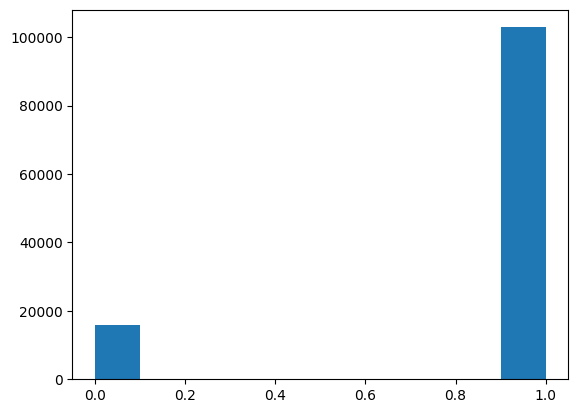

In [ ]:
plt.hist(df['agent'])

After categorized agent column into two groups, with agent or without agent, we have 14% booking have no agent, and about 86% with a agent.

In [ ]:
# confirm that null value has been either removed or filled
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

#**Exploratory Data Analysis**

###Visualizations - Correlation Matrix (continuous variables)

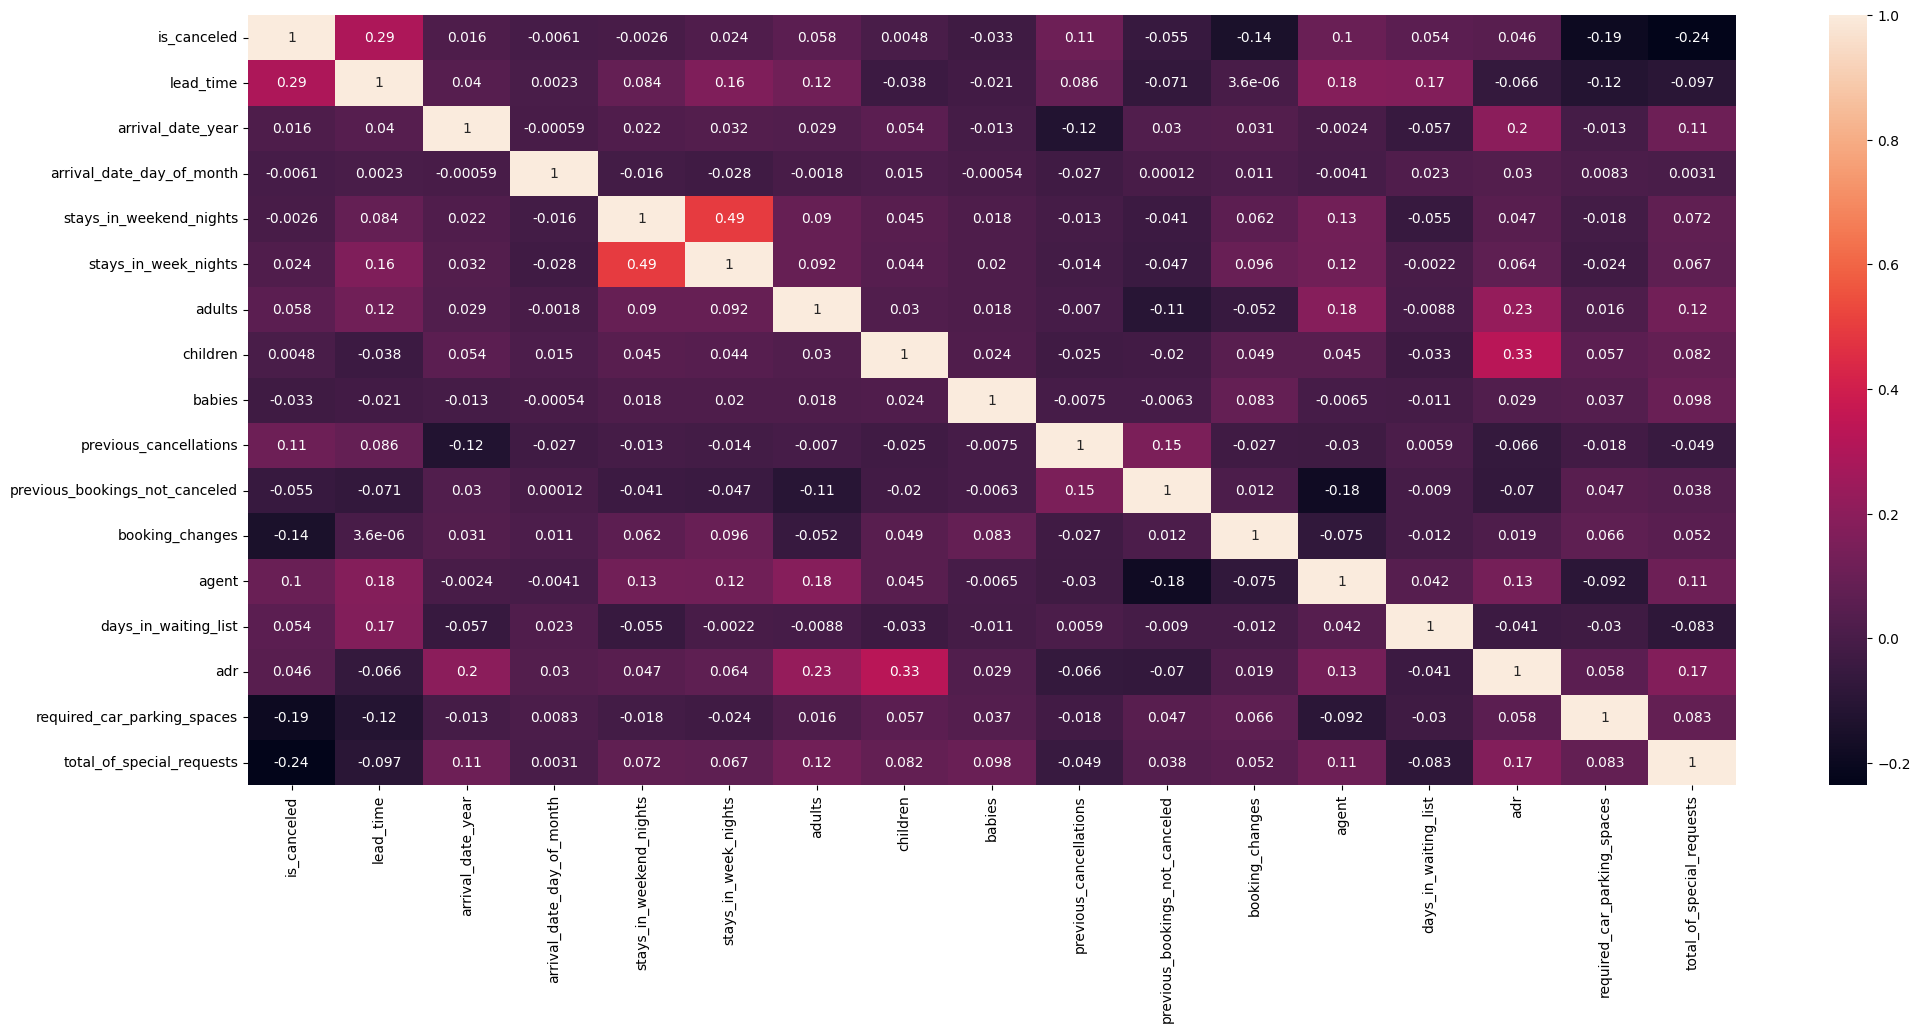

In [ ]:
plt.figure(figsize = (24,10))
ax = plt.axes()

ax = seaborn.heatmap(data = df.corr(), annot=True)
plt.show()

In [ ]:
df.corr()['is_canceled'].sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.291994
previous_cancellations            0.109922
agent                             0.099512
adults                            0.058381
days_in_waiting_list              0.054016
adr                               0.046199
stays_in_week_nights              0.024110
arrival_date_year                 0.016412
children                          0.004751
stays_in_weekend_nights          -0.002631
arrival_date_day_of_month        -0.006127
babies                           -0.032521
previous_bookings_not_canceled   -0.055493
booking_changes                  -0.144659
required_car_parking_spaces      -0.194796
total_of_special_requests        -0.235643
Name: is_canceled, dtype: float64

We see in the correlation matrix, and sorted the value in decending order, the most positive correlated column is lead_time. The most negative correlated column is total_of_special_requests, followed by required_car_parking_spaces and booking_changes.

Text(0, 0.5, 'Number of Booking')

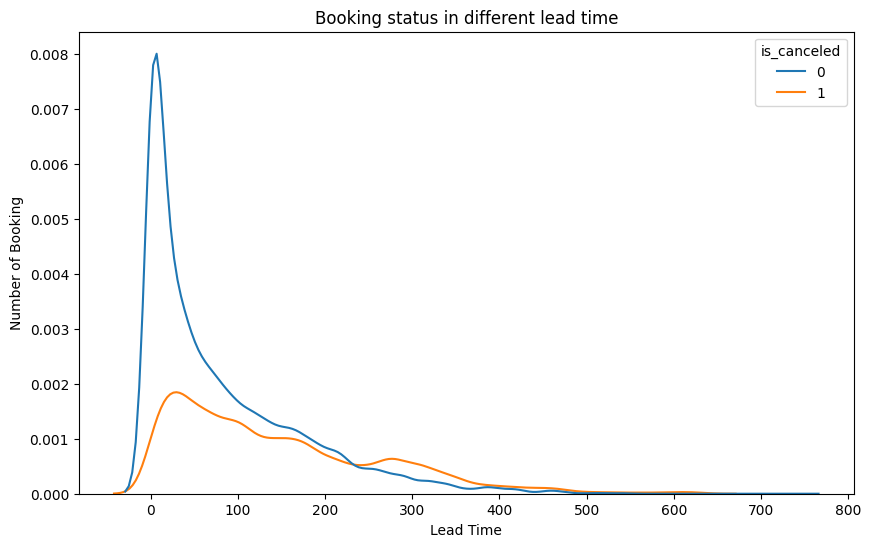

In [ ]:
plt.figure(figsize = (10,6))
ax1 = seaborn.kdeplot(x = 'lead_time', hue = 'is_canceled', data = df)
plt.title('Booking status in different lead time')
plt.xlabel('Lead Time')
plt.ylabel('Number of Booking')

Based on the correlation matrix, I run a kde plot above to check the relationship between cancellation and lead time. 

### Visualizations - Bar Chart(Categorical variables)

Text(0, 0.5, 'Number of Reservations')

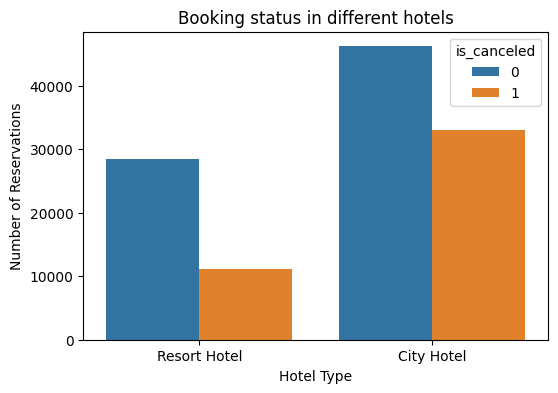

In [ ]:
plt.figure(figsize = (6,4))
ax2 = seaborn.countplot(x = 'hotel', hue = 'is_canceled', data = df)
plt.title('Booking status in different hotels')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Booking')

In [ ]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

Based on the plot of booking status in different hotels, the total booking rate in city hotel is higer than resort hotel. Also, the cancellation in resort hotel are much less than it is in city hotel.

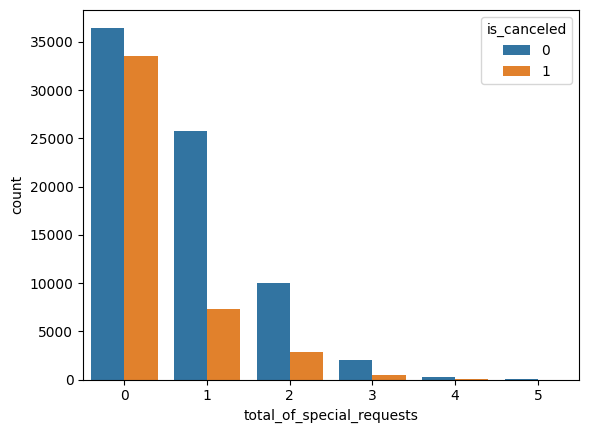

In [ ]:
seaborn.countplot(x = 'total_of_special_requests', hue = 'is_canceled', data = df)
plt.show()

When the number of special requests were asked by guests is higher, it is less likely the guests would cancel the hotel.

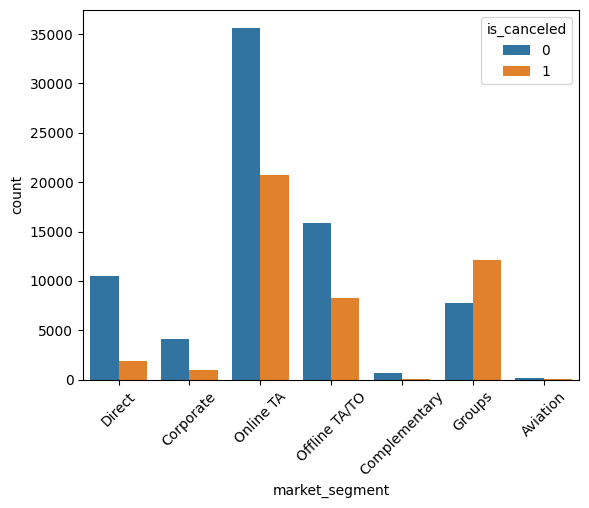

In [ ]:
seaborn.countplot(x = 'market_segment', hue = 'is_canceled', data = df)
plt.xticks(rotation = 45)
plt.show()

The Groups has the highest cancellation rate in this plot.

<Figure size 1200x800 with 0 Axes>

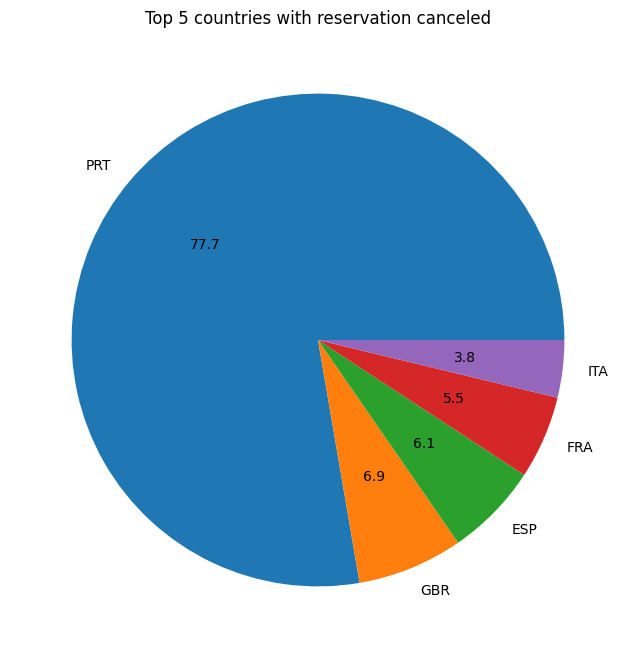

In [ ]:
plt.figure(figsize = (12,8))
cancellations = df[df['is_canceled'] == 1]
canceled_country_5 = cancellations['country'].value_counts()[:5]
plt.figure(figsize = (8,8))
plt.title('Top 5 countries with Booking canceled')
plt.pie(canceled_country_5,autopct = '%.1f',labels = canceled_country_5.index)
plt.show()

Portugal has the highest percentage of cancellation, and followed by GBR(United Kingdom) and ESP(Spain).

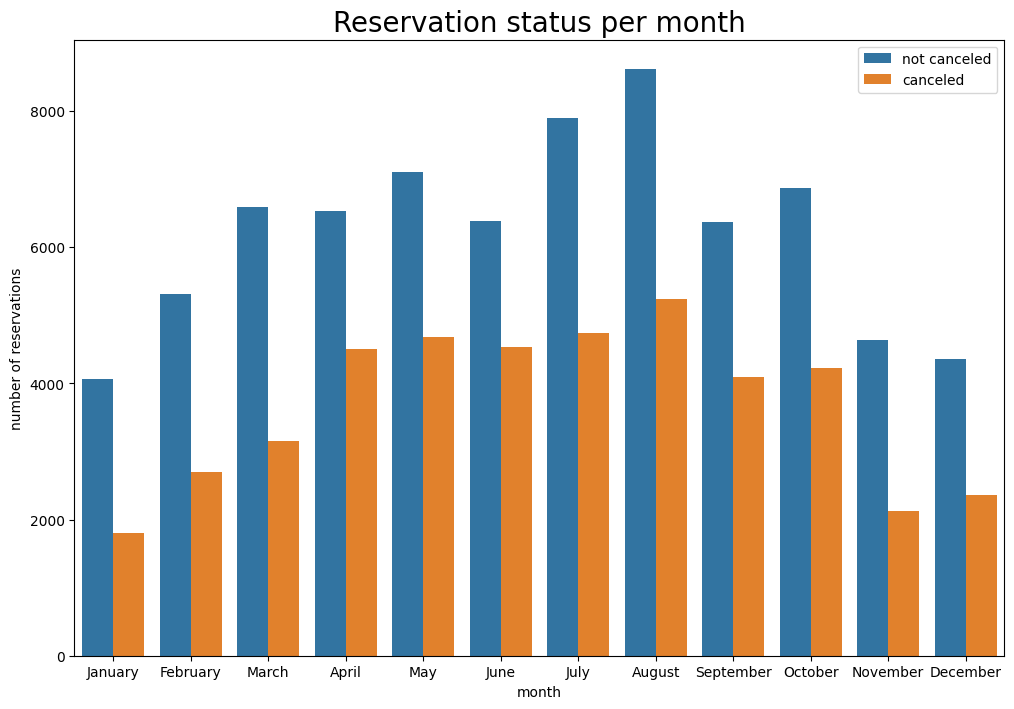

In [ ]:
plt.figure(figsize = (12, 8))
ax4 = seaborn.countplot(x = 'arrival_date_month', hue = 'is_canceled', data = df, order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Arrival date per month',size = 20)
plt.xlabel('Month')
plt.ylabel('Number of Booking')
plt.legend(['not canceled','canceled'])
plt.show()

#**Analysis based on EDA**

Based on the correlation matrix above, we saw that cancellation and lead time has the highest postive correlation, so I run a kde plot to check what the pattern is. Typically, it suggests that the sooner the bookings are made, the less likely to be canceled by customers.

Also, I chose a couple features that may help observe the relationship with  cancellation. According to the first bar chart, the cancellation in city hotel has reached almost 50% of the total numbers of booking, and compare it with resort hotel, the percentage of cancellation is much lower. 

In the second chart, the greater the number of special requests the less likely this booking will be canceled.

Then, if booking from online Travel Agents are more likely to be canceled than booking from other market segment.

In the next pie chart to check the top 5 countries with booking canceled, we see that PRT, which refers to Portugal, has the highest percentage of cancellation, and it is followed by GBR(United Kingdom) and ESP(Spain). 

The last bar chart is booking status, including canceled and not canceled booking in different months. So we see as the booking gets higher, the cancellation also goes up. The highest number of bookings and cancellations are both in July and August, and the lowest are January and December. But it does not have a significant correlation with arrival month.

#**Models**

First we divide features into categorical and contiunous variables and then encoder the categorical features, and scale the numerical features. After that, I concatenate both categorical and numerical features.

In [ ]:
# Divide features into categorical and continuous variables

y = df['is_canceled']
df.drop('is_canceled', axis = 1, inplace = True)

df_con = df.select_dtypes(['int64', 'float64'])
df_cat = df.select_dtypes('object') 

In [ ]:
# Encode the categorical features
encoder=LabelEncoder()
dict_cat={}
for feature in df_cat.columns:
    dict_cat[feature]=encoder.fit_transform(df_cat[feature])
# converting back the encoded feature into dataframe
df_cat=pd.DataFrame(dict_cat)

# Scaling of the numerical features
scaler=MinMaxScaler()
df_con=pd.DataFrame(scaler.fit_transform(df_con),columns=df_con.columns)

In [ ]:
df_new = pd.concat([df_con, df_cat], axis = 1)

In [ ]:
# Split into test/train set
X_train, X_test, y_train, y_test = train_test_split(df_new, y, train_size=0.8)

## Convert our y data into arrays.
y_train = np.array(y_train)
y_test = np.array(y_test)

## Double check the size of our different inputs and outputs to confirm size.
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

95118
95118
23780
23780


##Logistic Regression

Accuracy Score of Logistic Regression:  0.7443650126156434
Precision:  0.7340797760671799
recall:  0.4792689891490577
Confusion Matrix: 
 [[13505  1520]
 [ 4559  4196]]
[0.         0.10116473 1.        ] [0.         0.47926899 1.        ]


Text(0.1, 0.5, 'AUC value:0.6890521318457434')

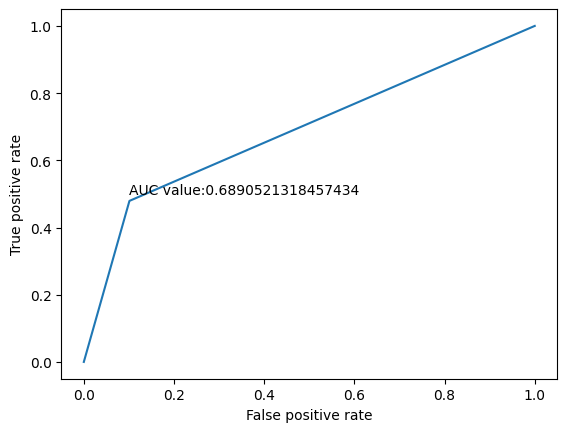

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
pred_lr = LogReg.predict(X_test)

acc_lr = accuracy_score(y_test, pred_lr)
prec_lr = precision_score(y_test, pred_lr)
rec_lr = recall_score(y_test, pred_lr)
cm_lr = confusion_matrix(y_test, pred_lr)

print("Accuracy Score of Logistic Regression: ", acc_lr)
print("Precision: ", prec_lr)
print("recall: ", rec_lr)
print("Confusion Matrix: \n", cm_lr)


fpr, tpr, threshold = roc_curve(y_test, pred_lr)
print(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.1,0.5,"AUC value:" + str(roc_auc_score(y_test, pred_lr)))

##Decision Tree Classifier

Accuracy Score of Decision Tree Classifier:  0.9282590412111018
Precision:  0.901392632524708
recall:  0.9064829455613282
Confusion Matrix: 
 [[14048   878]
 [  828  8026]]
[0.         0.05882353 1.        ] [0.         0.90648295 1.        ]


Text(0.1, 0.5, 'AUC value:0.9238297080747818')

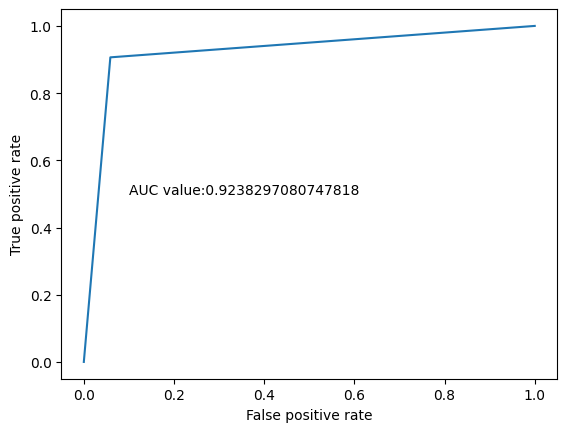

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, pred_dtc)
prec_dtc = precision_score(y_test, pred_dtc)
rec_dtc = recall_score(y_test, pred_dtc)
cm_dtc = confusion_matrix(y_test, pred_dtc)

print("Accuracy Score of Decision Tree Classifier: ", acc_dtc)
print("Precision: ", prec_dtc)
print("recall: ", rec_dtc)
print("Confusion Matrix: \n", cm_dtc)


fpr, tpr, threshold = roc_curve(y_test, pred_dtc)
print(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.1,0.5,"AUC value:" + str(roc_auc_score(y_test, pred_dtc)))

##Random Forest Classifier

Accuracy Score of Random Forest Classifier:  0.9402859545836838
Precision:  0.9560736196319018
recall:  0.8800542127851818
Confusion Matrix: 
 [[14568   358]
 [ 1062  7792]]
[0.         0.02398499 1.        ] [0.         0.88005421 1.        ]


Text(0.1, 0.5, 'AUC value:0.9280346100774362')

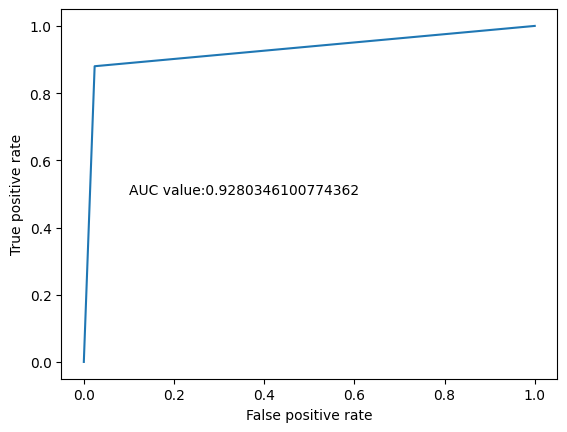

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

acc_rfc = accuracy_score(y_test, pred_rfc)
prec_rfc = precision_score(y_test, pred_rfc)
rec_rfc = recall_score(y_test, pred_rfc)
cm_rfc = confusion_matrix(y_test, pred_rfc)

print("Accuracy Score of Random Forest Classifier: ", acc_rfc)
print("Precision: ", prec_rfc)
print("recall: ", rec_rfc)
print("Confusion Matrix: \n", cm_rfc)

fpr, tpr, threshold = roc_curve(y_test, pred_rfc)
print(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.1,0.5,"AUC value:" + str(roc_auc_score(y_test, pred_rfc)))

##Gradient Boosting Classifier

Accuracy Score of Gradient Boosting Classifier:  0.8759041211101766
Precision:  0.893166378047156
recall:  0.7572848430088096
Confusion Matrix: 
 [[14124   802]
 [ 2149  6705]]
[0.         0.05373174 1.        ] [0.         0.75728484 1.        ]


Text(0.1, 0.5, 'AUC value:0.8517765498710135')

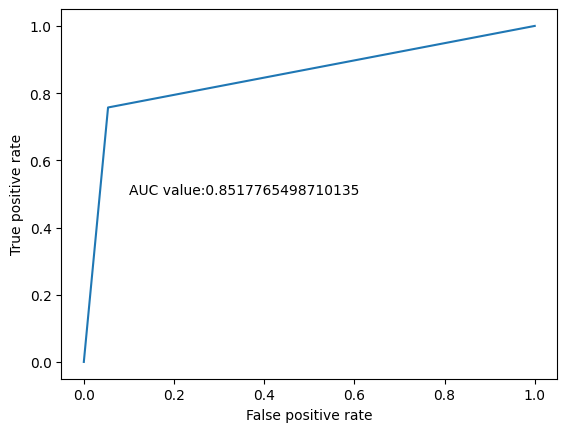

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, pred_gb)
prec_gb = precision_score(y_test, pred_gb)
rec_gb = recall_score(y_test, pred_gb)
cm_gb = confusion_matrix(y_test, pred_gb)

print("Accuracy Score of Gradient Boosting Classifier: ", acc_gb)
print("Precision: ", prec_gb)
print("recall: ", rec_gb)
print("Confusion Matrix: \n", cm_gb)

fpr, tpr, threshold = roc_curve(y_test, pred_gb)
print(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.1,0.5,"AUC value:" + str(roc_auc_score(y_test, pred_gb)))

##XGBoost Classifier (not covered in class)

Accuracy Score of XGBoosting Classifier:  0.9471825063078217
Precision:  0.973601111532146
recall:  0.880411193603655
Confusion Matrix: 
 [[14816   209]
 [ 1047  7708]]
[0.         0.01391015 1.        ] [0.         0.88041119 1.        ]


Text(0.1, 0.5, 'AUC value:0.9332505219266195')

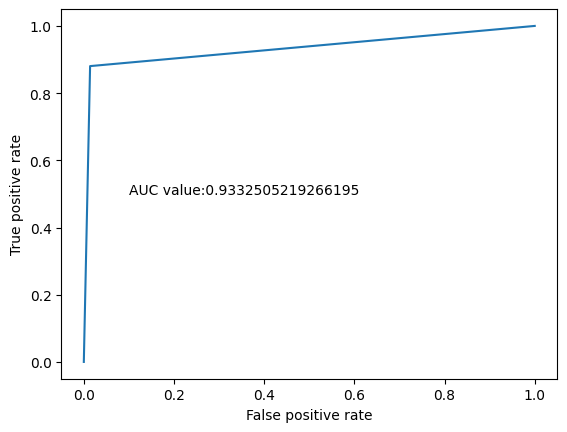

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, pred_xgb)
prec_xgb = precision_score(y_test, pred_xgb)
rec_xgb = recall_score(y_test, pred_xgb)
cm_xgb = confusion_matrix(y_test, pred_xgb)

print("Accuracy Score of XGBoosting Classifier: ", acc_xgb)
print("Precision: ", prec_xgb)
print("recall: ", rec_xgb)
print("Confusion Matrix: \n", cm_xgb)

fpr, tpr, threshold = roc_curve(y_test, pred_xgb)
print(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.1,0.5,"AUC value:" + str(roc_auc_score(y_test, pred_xgb)))

##**Results**

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XGBoosting Classifier'],
    'Score' : [acc_lr, acc_dtc, acc_rfc, acc_gb, acc_xgb]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XGBoosting Classifier,0.947183
2,Random Forest Classifier,0.940286
1,Decision Tree Classifier,0.928259
3,Gradient Boosting Classifier,0.875904
0,Logistic Regression,0.744365


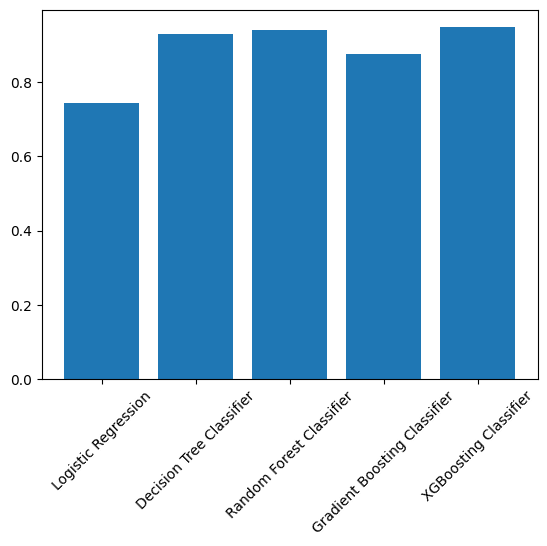

In [ ]:
plt.bar(list(models['Model']), list(models['Score']))
plt.xticks(rotation = 45)
plt.show()

##**Analysis/Conclusion**


Using our five classifiers above, we saw some very interesting trends. Let's start with the basics. 

First of all, for logistic regression model only resulted in 0.78 accuracy score, which is the lowest score in all of the models we were using. Also, for gradient boosting classifier model, the accuracy score, recall and precision are only a little higher than the logistic regression model.

From the ROC curve it is evident that the XGBoosting Classifier is the best performing classification model. The model clearly outperforms the Logistic Regression and Gradient Boosting, and marginally outperforms the Decision Tree and Random Forest. The high accuracy score of 94.7% indicates that in most instances the model will correctly predict if a booking will be cancelled or not.

For the decision tree model, we were able to get the accuracy score in 0.92, which is much higher than logistic regression model and Gradient boosting classifier model. Although this accuracy score is still lower than XGBoosting and Random Forest Classifier, its recall value is the highest among them all. A classification model's recall rate tells the true positive rate. It start with the total number of records that actually belong to the positive outcome, and find the percentage of those records that the model assigned to the positive outcomes. As recall value gets higher, correctly predict cancellation percentage is higher. In this project, the recall rate can help the hotel management to handle overbooking issue to maximize their profit. Therefore, I will consider this decision tree model as my final model. 

To sum up, the feature importance's provide valuable information about which variables should be focused upon when formulating a strategy to reduce booking cancellations. Additionally, the outputs of the XGBoosting Classifier, Decision Tree and Random Forest provide accurate predictions with regards to whether a new booking will be cancelled. As mentioned above, this is allows for more accurate revenue forecasts. Thus, the machine learning classifiers provide hotel managements with accurate predictions on future booking cancellations whilst simultaneously supplying information about the underlying causes of such cancellations. Moreover, by using decision tree model the hotel management can strategically plan overbooking to maximize their profits.